In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load cleaned dataset
df = pd.read_csv("../data/clean_telco.csv")

# Preview
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [5]:
print("Shape :",df.shape)
print("\n\n--------- Numeric Columns ---------")
print(df.describe())

print("\n\n--------- Categorical Columns ---------")
print(df.describe(include='object'))

Shape : (7043, 20)


--------- Numeric Columns ---------
       SeniorCitizen      Partner   Dependents       tenure  PhoneService  \
count    7043.000000  7043.000000  7043.000000  7043.000000   7043.000000   
mean        0.162147     0.483033     0.299588    32.371149      0.903166   
std         0.368612     0.499748     0.458110    24.559481      0.295752   
min         0.000000     0.000000     0.000000     0.000000      0.000000   
25%         0.000000     0.000000     0.000000     9.000000      1.000000   
50%         0.000000     0.000000     0.000000    29.000000      1.000000   
75%         0.000000     1.000000     1.000000    55.000000      1.000000   
max         1.000000     1.000000     1.000000    72.000000      1.000000   

       PaperlessBilling  MonthlyCharges  TotalCharges        Churn  
count       7043.000000     7043.000000   7043.000000  7043.000000  
mean           0.592219       64.761692   2281.916928     0.265370  
std            0.491457       30.090047   

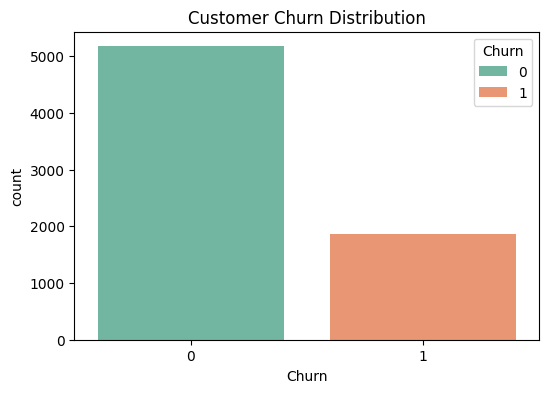

churn rate : 26.54%


In [6]:
#Step 3️⃣: Churn Distribution (Target Variable)
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='Churn',hue='Churn',palette='Set2')
plt.title('Customer Churn Distribution')
plt.show()

churn_rate =df['Churn'].mean() * 100
print(f"churn rate : {churn_rate:.2f}%")

In [7]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0


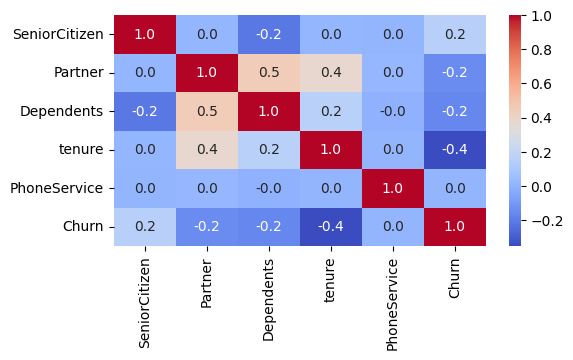

In [8]:
corr = df[['SeniorCitizen', 'Partner', 'Dependents', 'tenure','PhoneService','Churn']].corr()
plt.figure(figsize=(6,3))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.1f')
plt.show()

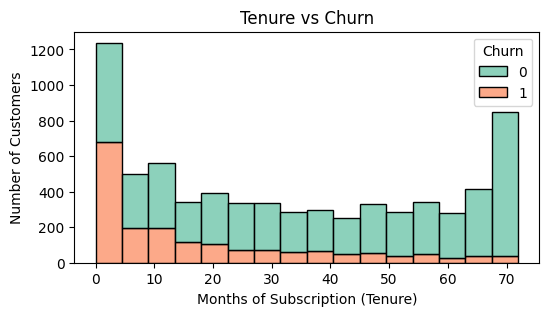

In [9]:
,#Step 4️⃣: Relationship Between Tenure & Churn
plt.figure(figsize=(6,3))
sns.histplot(data=df,x='tenure',hue='Churn',multiple='stack',palette='Set2')
plt.title("Tenure vs Churn")
plt.xlabel("Months of Subscription (Tenure)")
plt.ylabel("Number of Customers")
plt.show()

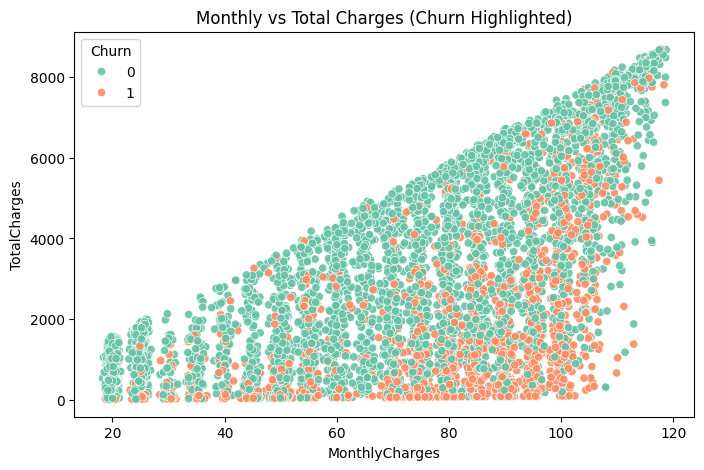

In [10]:
#Step 5️⃣: Monthly Charges vs Total Charges
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn',alpha=0.9,palette='Set2')
plt.title("Monthly vs Total Charges (Churn Highlighted)")
plt.show()

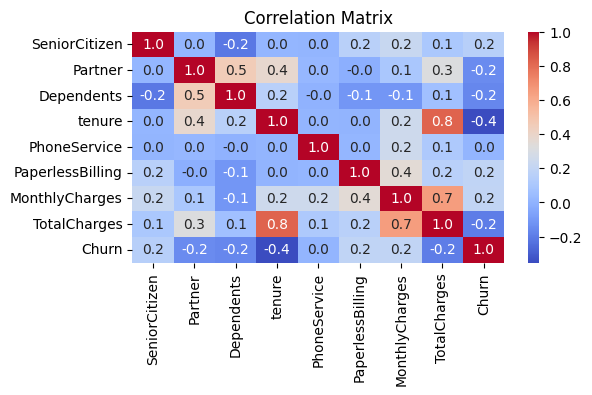

In [14]:
#Step 6️⃣: Correlation Heatmap (Numeric Only)
plt.figure(figsize=(6,3))
corr = df.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.1f')
plt.title("Correlation Matrix")
plt.show()

C:\Users\nezha\AppData\Local\Temp\ipykernel_11068\2759130015.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df , x='Contract',y='Churn',estimator='mean',palette='coolwarm')


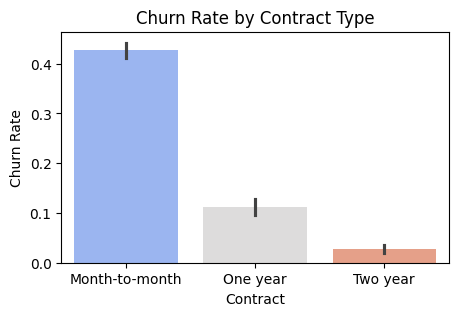

In [12]:
#Step 7️⃣: Churn Rate by Contract Type
plt.figure(figsize=(5,3))
sns.barplot(data=df , x='Contract',y='Churn',estimator='mean',palette='coolwarm')
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.show()

In [13]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
